In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

titanic = sns.load_dataset('titanic')
titanic.columns=titanic.columns.str.capitalize()
df = titanic.copy()

# 데이터 불러오기

## pd.read_csv

csv 데이터 읽어오기

In [ ]:
# data = pd.read_csv('C:/Users/Han/Desktop/Statistics/Python/Dataset/Seoul_Happiness_2014_train.csv')

## data.to_csv

csv 데이터 저장하기

In [ ]:
# data.to_csv('C:/Users/Han/Desktop/Statistics/Python/Dataset/Seoul_Happiness_2014_train.csv')

# 데이터 대충 훑어보기

## df.head() | df.tail() 

In [23]:
df.head()

Survived  Pclass     Sex   Age  Sibsp  Parch     Fare Embarked  Class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     Who  Adult_male Deck  Embark_town Alive  Alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [24]:
df.tail()

Survived  Pclass     Sex   Age  Sibsp  Parch   Fare Embarked   Class  \
886         0       2    male  27.0      0      0  13.00        S  Second   
887         1       1  female  19.0      0      0  30.00        S   First   
888         0       3  female   NaN      1      2  23.45        S   Third   
889         1       1    male  26.0      0      0  30.00        C   First   
890         0       3    male  32.0      0      0   7.75        Q   Third   

       Who  Adult_male Deck  Embark_town Alive  Alone  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True

In [26]:
df.columns.values

array(['Survived', 'Pclass', 'Sex', 'Age', 'Sibsp', 'Parch', 'Fare',
       'Embarked', 'Class', 'Who', 'Adult_male', 'Deck', 'Embark_town',
       'Alive', 'Alone'], dtype=object)

## df.shape

1.어떤 dim 을 가지고있을까?

In [27]:
df.shape

(891, 15)

## df.info() 

1. 데이터의 col 얼마나 값이 있을까? (nan 제외하고) <br>
2. 데이터의 col 들은 각각 어떤 data type 일까? <br>
3. 데이터의 col 들에 대해 dtype이 몇개나 있을까?

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
Sibsp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
Class          891 non-null category
Who            891 non-null object
Adult_male     891 non-null bool
Deck           203 non-null category
Embark_town    889 non-null object
Alive          891 non-null object
Alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


## df.isnull()

데이터가 얼마나 곁측치가 있는지 조사하기

In [20]:
df.isnull().sum().sum()

869

col 별로 곁측치 조사하기

In [3]:
df.isnull().sum(axis=0)

Survived         0
Pclass           0
Sex              0
Age            177
Sibsp            0
Parch            0
Fare             0
Embarked         2
Class            0
Who              0
Adult_male       0
Deck           688
Embark_town      2
Alive            0
Alone            0
dtype: int64

col 별로 곁측치의 비율 조사하기

In [7]:
df.isnull().sum(axis=0)/df.shape[0] 

Survived       0.000000
Pclass         0.000000
Sex            0.000000
Age            0.198653
Sibsp          0.000000
Parch          0.000000
Fare           0.000000
Embarked       0.002245
Class          0.000000
Who            0.000000
Adult_male     0.000000
Deck           0.772166
Embark_town    0.002245
Alive          0.000000
Alone          0.000000
dtype: float64

## df.describe()

1. 수치형 자료들에 대한 기초통계량

In [30]:
df.describe()

Survived      Pclass         Age       Sibsp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

의외로 이 describe 에서 얻을 수 있는 intuition 이 엄청 많다.
- Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
- Survived is a categorical feature with 0 or 1 values.
- Around 38% samples survived representative of the actual survival rate at 32%.
- Most passengers (> 75%) did not travel with parents or children.
- Nearly 30% of the passengers had siblings and/or spouse aboard.
- Fares varied significantly with few passengers (<1%) paying as high as $512.
- Few elderly passengers (<1%) within age range 65-80.

## df.describe(include=['object'])

1. categorical 자료에 대해 살펴보기

In [31]:
df.describe(include=['object'])

Sex Embarked  Who  Embark_town Alive
count    891      889  891          889   891
unique     2        3    3            3     2
top     male        S  man  Southampton    no
freq     577      644  537          644   549

 - top is the most common value. 
 - freq is the most common value'sfrequency

# 데이터 깊게 살펴보기

## df['col'].value_counts()

unique 한 값들이 얼마나 있는지 보여준다. <br>
단, dataframe 에 대해서는 이 기능이 작동하지 않으므로 주의한다. ['col'] 처럼 Series 인 경우에 작동한다.

In [67]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## df.sort_values()

df.sort_values(by='col' , ascending = True/Flase) <br>
 - by : 어떤 col 을 기준으로 할 것인지
 - ascending : 정렬의 기준

In [32]:
df.sort_values(by='Fare',ascending=False).head()

Survived  Pclass     Sex   Age  Sibsp  Parch      Fare Embarked  Class  \
258         1       1  female  35.0      0      0  512.3292        C  First   
737         1       1    male  35.0      0      0  512.3292        C  First   
679         1       1    male  36.0      0      1  512.3292        C  First   
88          1       1  female  23.0      3      2  263.0000        S  First   
27          0       1    male  19.0      3      2  263.0000        S  First   

       Who  Adult_male Deck  Embark_town Alive  Alone  
258  woman       False  NaN    Cherbourg   yes   True  
737    man        True    B    Cherbourg   yes   True  
679    man        True    B    Cherbourg   yes  False  
88   woman       False    C  Southampton   yes  False  
27     man        True    C  Southampton    no  False

요금이 높은사람은 대부분 살아있음을 알 수 있다... 

## df.groupby().aggregate

 df.groupby([['col','col]]).aggregate({'col':[function]})
  - groupby([['col','col]]) 의 col : 분석대상의 col
  - aggregate({'col':[function]}) 의 col : 표기 대상. value 가 되는 대상
  - aggregate({'col':[function]}) 의 function : value 가 되는 함수. mean, var 등 가능

In [4]:
df[['Pclass','Survived']].groupby(['Pclass']).aggregate({'Survived':np.mean}).sort_values(by='Survived',ascending=False)

Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363

# 간단한 시각화(visualization 참조)

[범주N : 수치1] notation 의 뜻 : 범주 N 개를 나누는 기준, 수치1이 표시하는 DATA

## sns.FacetGrid [범주N][x:수치/y:수치]

 [범주들을 엮어서 하나의 수치를 비교]

C:\Users\Han\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


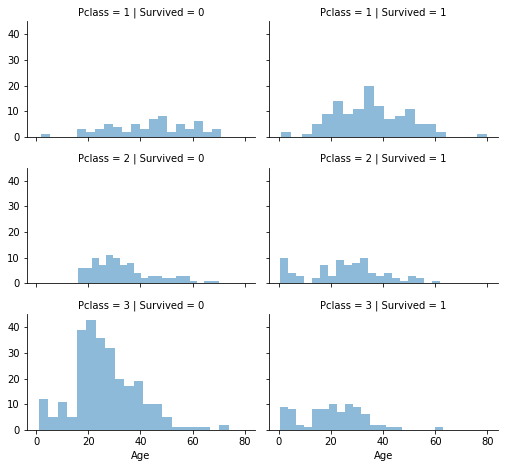

In [3]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

## sns.FacetGrid [범주N][x:범주/y:수치]

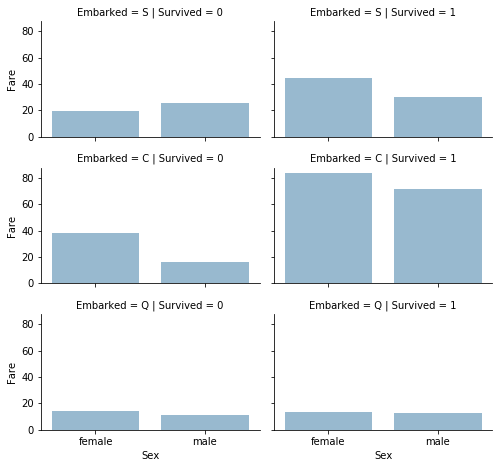

In [13]:
grid = sns.FacetGrid(df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None);

## sns.FacetGrid [범주N][x:범주/y:범주]

아래 그래프는 y 가 수치형 아닌가? 할 수 있지만, 범주형을 0,1 로 나눌 경우 아래처럼 표현할 수 있다.

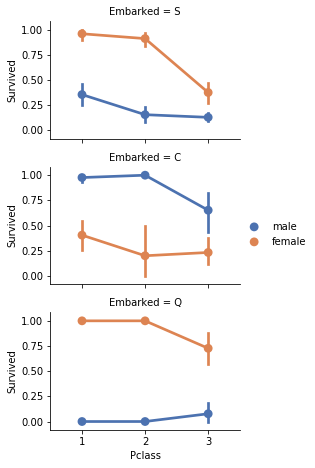

In [8]:
grid = sns.FacetGrid(df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived','Sex', palette='deep')
grid.add_legend();

In [ ]:
g = sns.PairGrid(Data)
g.map_diag(plt.hist, bins=9)

def pairgrid_heatmap(x, y, **kws):
    cmap = sns.light_palette(kws.pop("color"), as_cmap=True)
    plt.hist2d(x, y, cmap=cmap, cmin=1, **kws)

g.map_offdiag(pairgrid_heatmap, bins=[9,9])

# 데이터 변환 전 준비하기 (dtype, copy .. )

## df.copy()

내가 하는 변환들이 실제로 먹히는지, 이것저것 실험할 수 있다. 그런데 이런 변환들을 원 data 에 하게 된다면, data 가 엉망징창이 될 것이다. 그래서 df_ = df.copy() 로 지정한 후, df_ 에서 잘 변환이 먹힌다면 그 이후에 변환을 적용해준다면 딱 좋을것이다.

In [42]:
df_ = df.copy()

## df['col'].astype()

데이터 변환을 하다보면 1,2,3 으로 되어있지만 object 로 되어있는경우, <br>
혹은 categorical 데이터라, category 가 맞아야만 변환이 되는경우 등등 짜증나는 경우가 많다. <br>
이러한 경우 df['col'].astype('int') 등의 변환을 통해서 변환의 에러를 해걸하자.

In [2]:
df = titanic.copy()
# df.loc[(titanic['Class']=='Second'),'Class'] = 0 이것 하면 에러가 뜬다. (class 가 categorical 데이터라 그렇다.)
df['Class']=df['Class'].astype('str')
df.loc[(titanic['Class']=='Third'),'Class'] = 0
df.head()

Survived  Pclass     Sex   Age  Sibsp  Parch     Fare Embarked  Class  \
0         0       3    male  22.0      1      0   7.2500        S      0   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S      0   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S      0   

     Who  Adult_male Deck  Embark_town Alive  Alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

## df.select_dtypes

df.select_dtypes(include=[type]).columns <br>
col 의 dtpye 이 어떤것이냐에 따라 column 들을 returns 한다 <br>
데이터 분석을 할 때에, df의 dtype 을 조정해야 할 수 있다. 그 경우 쓸 수 있다.

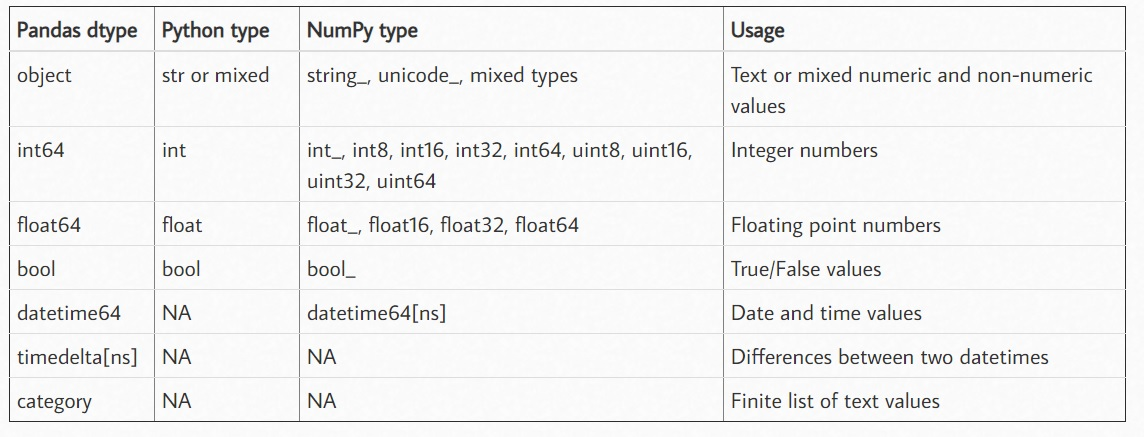

In [6]:
Image("C:/Users/goran/Desktop/Python/Tools/Data Processing/Pictures/pandas dtype.jpg")

In [5]:
df = titanic.copy()
col=df.select_dtypes(include=[np.int64]).columns
df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
Survived       891 non-null category
Pclass         891 non-null category
Sex            891 non-null object
Age            714 non-null float64
Sibsp          891 non-null category
Parch          891 non-null category
Fare           891 non-null float64
Embarked       889 non-null object
Class          891 non-null category
Who            891 non-null object
Adult_male     891 non-null bool
Deck           203 non-null category
Embark_town    889 non-null object
Alive          891 non-null object
Alone          891 non-null bool
dtypes: bool(2), category(6), float64(2), object(5)
memory usage: 57.2+ KB


# Col 변환

## df.drop()

df.drop('col', axis=1)
- df 에서 없애고싶은 col 을 drop 한다
- 이때 없애고싶은 col 의 이름으로 drop 하는게 아니라, index 로 drop 하고싶다면

df.drop(df.columns[1:4], axis=1) 
- 위 방법을 쓴다


In [5]:
df = titanic.copy()
df.drop(df.columns[1:4], axis=1).head()

Survived  Sibsp  Parch     Fare Embarked  Class    Who  Adult_male Deck  \
0         0      1      0   7.2500        S  Third    man        True  NaN   
1         1      1      0  71.2833        C  First  woman       False    C   
2         1      0      0   7.9250        S  Third  woman       False  NaN   
3         1      1      0  53.1000        S  First  woman       False    C   
4         0      0      0   8.0500        S  Third    man        True  NaN   

   Embark_town Alive  Alone  
0  Southampton    no  False  
1    Cherbourg   yes  False  
2  Southampton   yes   True  
3  Southampton   yes  False  
4  Southampton    no   True

## np.where(df.columns.values == ' ')

col 의 이름에 대한 위치를 알려준다.

In [3]:
np.where(df.columns.values == 'Fare')

(array([6], dtype=int64),)

 ## df.columns

데이터의 col name 들을 한번에 바꿀때 유용한다.

In [4]:
df = titanic.copy()
df.columns.values # 여기서 columns 를 복사한다. 그다음
df.columns = ['a', 'bbb', 'Sex', 'Age', 'Sibsp', 'Parch', 'Fare',
       'Embarked', 'Class', 'ccc', 'Adult_male', 'Deck', 'Embark_town',
       'Alive', 'Alone']
df.head()

a  bbb     Sex   Age  Sibsp  Parch     Fare Embarked  Class    ccc  \
0  0    3    male  22.0      1      0   7.2500        S  Third    man   
1  1    1  female  38.0      1      0  71.2833        C  First  woman   
2  1    3  female  26.0      0      0   7.9250        S  Third  woman   
3  1    1  female  35.0      1      0  53.1000        S  First  woman   
4  0    3    male  35.0      0      0   8.0500        S  Third    man   

   Adult_male Deck  Embark_town Alive  Alone  
0        True  NaN  Southampton    no  False  
1       False    C    Cherbourg   yes  False  
2       False  NaN  Southampton   yes   True  
3       False    C  Southampton   yes  False  
4        True  NaN  Southampton    no   True

## df.rename(columns = {'old':'new'})

특정한 위치의 col 이름을 바꾼다.

In [38]:
df = titanic.copy()
df.rename(columns = {'Age':'NONONO'}) 
df.head()

Survived  Pclass     Sex   Age  Sibsp  Parch     Fare Embarked  Class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     Who  Adult_male Deck  Embark_town Alive  Alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

## df.columns.str.capitalize()

- str.capitalize() : 첫글자 대문자, 나머지 소문자 (age -> Age)
- str.lower() : 모두 소문자로
- str.upper()  모두 대문자로

In [39]:
df = titanic.copy()
df.columns=df.columns.str.lower()
df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

## pd.concat

새로운 열을 추가해 줄 수 있다. 단 axis=1 은 써줘야한다. 그래야 col 을 더하게된다.

In [49]:
df = titanic.copy()
non = pd.DataFrame([])
df_new = pd.concat([non,df.loc[:,'Sex':'Fare']],axis=1)
df_new.head()

Sex   Age  Sibsp  Parch     Fare
0    male  22.0      1      0   7.2500
1  female  38.0      1      0  71.2833
2  female  26.0      0      0   7.9250
3  female  35.0      1      0  53.1000
4    male  35.0      0      0   8.0500

## df.insert()

df.insert(loc=7, column='name', value ='data')
- loc = insert 할 위치
- column = insert 할 때, 적용되는 col name 
- value = insert 할 때, 적용되는 data

In [6]:
df = titanic.copy()
fare=pd.qcut(df['Fare'],q=np.linspace(0,1,4), labels=['Low','Medium','High']) # pd.qcut 은 내용확인!
df.insert(loc= 7, column='Fare_', value = fare)
# 원하는 위치 (fare 옆) 에 insert 하기 위해 np.where(df.columns.values == ' ') 를 써서 어디인지 확인해보자.
df.head()

Survived  Pclass     Sex   Age  Sibsp  Parch     Fare Fare_ Embarked  \
0         0       3    male  22.0      1      0   7.2500   Low        S   
1         1       1  female  38.0      1      0  71.2833  High        C   
2         1       3  female  26.0      0      0   7.9250   Low        S   
3         1       1  female  35.0      1      0  53.1000  High        S   
4         0       3    male  35.0      0      0   8.0500   Low        S   

   Class    Who  Adult_male Deck  Embark_town Alive  Alone  
0  Third    man        True  NaN  Southampton    no  False  
1  First  woman       False    C    Cherbourg   yes  False  
2  Third  woman       False  NaN  Southampton   yes   True  
3  First  woman       False    C  Southampton   yes  False  
4  Third    man        True  NaN  Southampton    no   True

# Data 변환(scaling/transform 참조)

## df.isin([])

df.isin 은 범주형의 자료를 묶어서 표현할 때에 아주 요긴하다.<br>
예로, 설문지의 문항이 1~10 이고, 이중 2,4,5,7,8 을 묶어서 0 으로 범주화하고싶다면, 이 경우 논리연산자 (==,!=,&,| 등) 만으로는 해결하는데 에 무리가 있기 떄문이다.


In [7]:
df = titanic.copy()
df['Class']= df['Class'].astype('str')

df.loc[titanic['Class'].isin(['Third','Second']),'Class'] = '0'
df.loc[~titanic['Class'].isin(['Third','Second']),'Class'] = '1'
df.head()

Survived  Pclass     Sex   Age  Sibsp  Parch     Fare Embarked Class  \
0         0       3    male  22.0      1      0   7.2500        S     0   
1         1       1  female  38.0      1      0  71.2833        C     1   
2         1       3  female  26.0      0      0   7.9250        S     0   
3         1       1  female  35.0      1      0  53.1000        S     1   
4         0       3    male  35.0      0      0   8.0500        S     0   

     Who  Adult_male Deck  Embark_town Alive  Alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

## pd.qcut()

pd.qcut(df['Fare'],q=np.linspace(0,1,4), labels=['Low','Medium','High'])
- q(quantile) 만큼 cut 해서 label=[] 로 수치형을 범주형으로 변환한다

In [41]:
fare=pd.qcut(df['Fare'],q=np.linspace(0,1,4), labels=['Low','Medium','High'])
fare.head()

0     Low
1    High
2     Low
3    High
4     Low
Name: Fare, dtype: category
Categories (3, object): [Low < Medium < High]

## pd.get_dummies

pd.get_dummies(df, columns=['Pclass'],drop_first=True)
- columns = ['col'] : 더미면수로 바꾸고 싶은 col 을 입력. 여러개를 입력할 수도 있다.
- drop_first=True : 처음 더미변수를 drop 할지 (0,1,2 의 범주를 더미변수화 할 때 더미col 이 2개만 나온다. 1,2,3 -> (0,0) , (1,0), (0,1)
- 더미변수화가 되는 col 은 자동으로 삭제된다.

In [5]:
df = titanic.copy()
df = pd.get_dummies(df, columns=['Pclass'],drop_first=True)
df.head()

Survived     Sex   Age  Sibsp  Parch     Fare Embarked  Class    Who  \
0         0    male  22.0      1      0   7.2500        S  Third    man   
1         1  female  38.0      1      0  71.2833        C  First  woman   
2         1  female  26.0      0      0   7.9250        S  Third  woman   
3         1  female  35.0      1      0  53.1000        S  First  woman   
4         0    male  35.0      0      0   8.0500        S  Third    man   

   Adult_male Deck  Embark_town Alive  Alone  Pclass_2  Pclass_3  
0        True  NaN  Southampton    no  False         0         1  
1       False    C    Cherbourg   yes  False         0         0  
2       False  NaN  Southampton   yes   True         0         1  
3       False    C  Southampton   yes  False         0         0  
4        True  NaN  Southampton    no   True         0         1

#  Data 보여주기

## display

아래로 붙여서 보여준다!

In [30]:
display(df.head(),df.tail())

Survived  Pclass     Sex   Age  Sibsp  Parch     Fare Embarked  Class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     Who  Adult_male Deck  Embark_town Alive  Alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

Survived  Pclass     Sex   Age  Sibsp  Parch   Fare Embarked   Class  \
886         0       2    male  27.0      0      0  13.00        S  Second   
887         1       1  female  19.0      0      0  30.00        S   First   
888         0       3  female   NaN      1      2  23.45        S   Third   
889         1       1    male  26.0      0      0  30.00        C   First   
890         0       3    male  32.0      0      0   7.75        Q   Third   

       Who  Adult_male Deck  Embark_town Alive  Alone  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True

## display side by side(def)

이경우는 옆으로 붙여서 보여준다.

In [19]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [20]:
p1=df[['Pclass','Survived']].groupby(['Pclass']).aggregate({'Survived':np.mean}).sort_values(by='Survived',ascending=False)
p2=df[["Sex", "Survived"]].groupby(['Sex']).aggregate({'Survived':np.mean}).sort_values(by='Survived',ascending=False)
p3=df[["Sibsp", "Survived"]].groupby(['Sibsp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
display_side_by_side(p1,p2,p3)

Survived 
 
 
 Pclass 
 
 
 
 
 
 1 
 0.629630 
 
 
 2 
 0.472826 
 
 
 3 
 0.242363 
 
 
 
 
 
 
 Survived 
 
 
 Sex 
 
 
 
 
 
 female 
 0.742038 
 
 
 male 
 0.188908 
 
 
 
 
 
 
 Sibsp 
 Survived 
 
 
 
 
 1 
 1 
 0.535885 
 
 
 2 
 2 
 0.464286 
 
 
 0 
 0 
 0.345395 
 
 
 3 
 3 
 0.250000 
 
 
 4 
 4 
 0.166667 
 
 
 5 
 5 
 0.000000 
 
 
 6 
 8 
 0.000000